## Put node informations
## ("name":(time cost, (ingredient node of the node"name")))

In [1]:
nodes={"a":(3,()),"b":(2,()),"c":(5,()),"d":(6,()),"e":(3,()),"f":(7,()),"g":(6,("a","b")),"h":(4,("b","c","d")),"i":(5,("g")),"j":(2,("e","f","g","h")),"k":(8,("i","j")),"l":(6,("j")),"m":(0,("k","l"))}

## Preparation to get event time

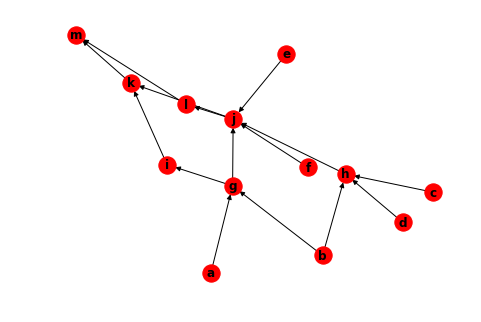

In [5]:
route_list=[]
for i in nodes:
    for j in nodes[i][1]:
        route_list.append((j,i))
reversed_material_dict={}
reversed_material_dict_vertial={}
for i in nodes:
    reversed_material_dict_vertial[i]=(nodes[i][0],[])
for r in route_list:
    for i in nodes:
        if i==r[0]:
            reversed_material_dict_vertial[i][1].append(r[1])
for i in nodes:
    reversed_material_dict[i]=(reversed_material_dict_vertial[i][0],tuple(reversed_material_dict_vertial[i][1]))
goal="m"
start_list=[]
for i in nodes:
    if nodes[i][1]==():
        start_list.append(i)
#plot by networkx
import networkx as nx
graph=nx.DiGraph()
for i in nodes:
    graph.add_node(i)
for k in route_list:
    graph.add_edge(k[0],k[1],weight=nodes[k[0]][0])
nx.draw(graph, with_labels=True, font_weight='bold')

## Get all of the path

In [10]:
all_path_list=[]
for s in start_list:
    for path in nx.all_simple_paths(graph, source= s, target=goal):
        all_path_list.append(path)
        print(path)

['a', 'g', 'i', 'k', 'm']
['a', 'g', 'j', 'k', 'm']
['a', 'g', 'j', 'l', 'm']
['b', 'g', 'i', 'k', 'm']
['b', 'g', 'j', 'k', 'm']
['b', 'g', 'j', 'l', 'm']
['b', 'h', 'j', 'k', 'm']
['b', 'h', 'j', 'l', 'm']
['c', 'h', 'j', 'k', 'm']
['c', 'h', 'j', 'l', 'm']
['d', 'h', 'j', 'k', 'm']
['d', 'h', 'j', 'l', 'm']
['e', 'j', 'k', 'm']
['e', 'j', 'l', 'm']
['f', 'j', 'k', 'm']
['f', 'j', 'l', 'm']


## Get earliest event time of all nodes

In [11]:
earliest_event_time_dict={}
for s in start_list:
    earliest_event_time_dict[s]=0
while len(earliest_event_time_dict)!=len(nodes):
    for i in nodes:
        if not nodes[i][1]==(): 
            earliest_event_time_dict[i]=earliest_event_time_dict[nodes[i][1][0]]+nodes[nodes[i][1][0]][0]
    for n in nodes[i][1]:
        if earliest_event_time_dict[i]<(earliest_event_time_dict[n]+nodes[n][0]):
            earliest_event_time_dict[i]=earliest_event_time_dict[n]+nodes[n][0]
print(earliest_event_time_dict)

{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 3, 'h': 2, 'i': 9, 'j': 3, 'k': 14, 'l': 5, 'm': 22}


## Get latest event time of all nodes

In [14]:
latest_event_time_dict={}
latest_event_time_dict[goal]=earliest_event_time_dict[goal]
while len(latest_event_time_dict)!=len(nodes):
    for i in nodes:
        if i!=goal:
            list=[]
            for k in latest_event_time_dict: 
                for l in reversed_material_dict_vertial[i][1]:
                    if k==l:
                        list.append(k)
            if list==reversed_material_dict_vertial[i][1]:
                latest_event_time_dict[i]=latest_event_time_dict[reversed_material_dict[i][1][0]]-reversed_material_dict[i][0]
                for j in reversed_material_dict_vertial[i][1]:
                    if latest_event_time_dict[i]>(latest_event_time_dict[j]-reversed_material_dict[i][0]):
                        latest_event_time_dict[i]=latest_event_time_dict[j]-reversed_material_dict[i][0]
print(latest_event_time_dict)

{'m': 22, 'k': 14, 'l': 16, 'i': 9, 'j': 12, 'e': 9, 'f': 5, 'g': 3, 'h': 8, 'a': 0, 'b': 1, 'c': 3, 'd': 2}


## Get margin of time

In [15]:
#余裕日数を取得
margin_dict={}
for i in nodes:
    margin_dict[i]=latest_event_time_dict[i]-earliest_event_time_dict[i]
print(margin_dict)

{'a': 0, 'b': 1, 'c': 3, 'd': 2, 'e': 9, 'f': 5, 'g': 0, 'h': 6, 'i': 0, 'j': 9, 'k': 0, 'l': 11, 'm': 0}


## Get the critical path

In [16]:
critical_path_list=[]
for path in all_path_list:
    t=[]
    for node in path:
        if margin_dict[node]==0:
            t.append(node)
    if path==t:
        critical_path_list.append(path)
print(critical_path_list)

[['a', 'g', 'i', 'k', 'm']]
